In [14]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

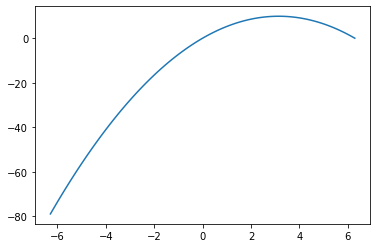

In [101]:
f = lambda x : np.power(x,1) * np.power(2*pi - x,1)
x = np.linspace(-2*pi,2*pi,100)
plt.plot(x,f(x))

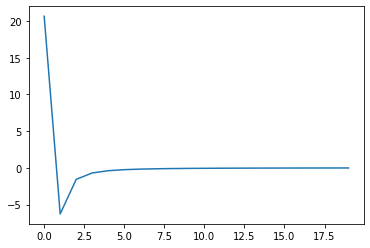

In [136]:
# On calcul les produits scalaires sans utiliser la transformee de fourier
def sc (f,n,N):
    t = np.linspace(0,2*pi,N)
    g = f(t) * np.cos(n*t)
    I = g.sum()
    I = pi*I/N
    return I

res = np.zeros(20)
for n in range(20):
    res[n] = sc(f,n,1000)
    
plt.plot(range(20),res)

I =  -0.06278910418716453


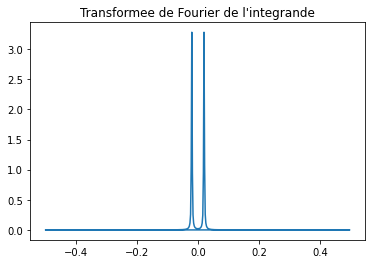

In [137]:
# On commence par un exemple avec n = 10
t = np.linspace(0,2*pi,500)
g = f(t) * np.cos(10*t)
fft = np.fft.fft(g)
fft/= len(fft)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq,np.abs(fft))
plt.title("Transformee de Fourier de l'integrande")

# Calcul de l'integrale
I = 2*pi*fft[0]
m = len(fft)
J = np.arange(m)
for k in range(1,int(m/2)):
    S = np.cos(2*J*k*pi/m).sum()
    I += 2*pi/m * (fft[k] + fft[int(m/2 + k)] ) * S

I = np.real(I/2)
print ("I = ", I)

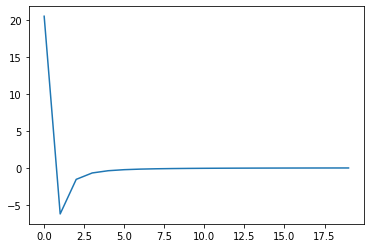

In [138]:
# Methode generale
def scwft(f,n):
    t = np.linspace(0,2*pi,100)
    g = f(t) * np.cos(n*t)
    fft = np.fft.fft(g)
    m = len(fft)
    fft /= m
    a0 = 2/(m-1) * f(t).sum()
    I = 2*pi*fft[0]
    J = np.arange(m)
    for k in range(1,int(m/2)):
        S = np.cos(2*pi*k*J/m).sum()
        I += (2*pi)/m * (fft[k] + fft[int(m/2)+k]) * S

    I = np.real(I/2)
    return I

res = np.zeros(20)
for n in range(20):
    res[n] = scwft(f,n)
    
plt.plot(range(20),res)

# Les ordres de grandeurs relatifs ont l'air bon mais les valeurs absolues semblent etre bien trop grandes
# Les valeurs grandissent avec la valeur de N dans linspace